# Classification with Logistic Regression and SVM

For this project we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). We'll be trying to predict a classification- survival or deceased.

## Import Libraries
Import all necessary libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

## The Data
Read the train dataset in to a pandas dataframe

In [2]:
train_data = pd.read_csv('titanic_train.csv',sep = ',', index_col= 'PassengerId')
test_data = pd.read_csv('titanic_test.csv',sep = ',', index_col= 'PassengerId')

In [36]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Exploratory Data Analysis

## Missing Data
Use the heatmap functionality of seaborn to see where we are missing data.

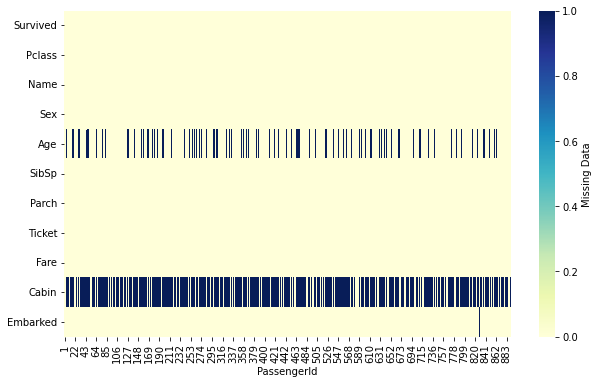

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(train_data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

Create a histogram for the target variable "Survived". You can use the seaborn.countplot function. 

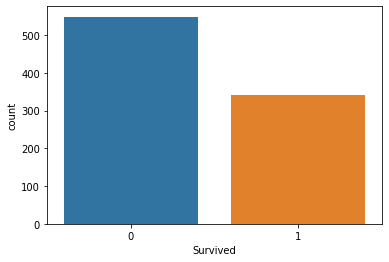

In [38]:
sns.countplot(x='Survived', data=train_data)

Create a histogram for the target variable "Survived" for males and females. 

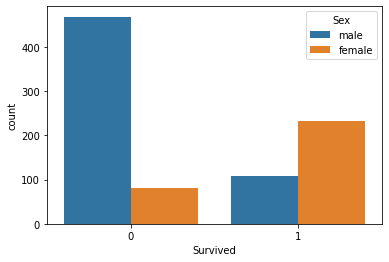

In [39]:
sns.countplot(x='Survived',hue='Sex', data=train_data)

Create a histogram for the  "Pclass" feature.

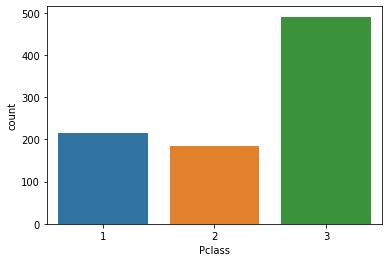

In [40]:
sns.countplot(x='Pclass', data=train_data)

## Data Cleaning
Fill in the missing data points with the average age for the age column. Drop the Cabin columna and all the row that have feature Emkarked that is NaN. 

In [41]:
#Replace missing fields for Age
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

In [42]:
#Drop columns
train_data.drop(['Cabin'], axis=1, inplace=True)

train_data = train_data.dropna(subset = ['Embarked'])

In [43]:
# Droping columns which may not be useful for deciding survival
train_data.drop(['Name', 'Ticket'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


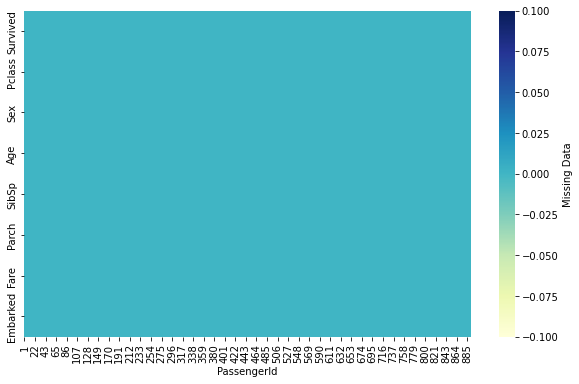

In [45]:
# Checking if missing fields exists
plt.figure(figsize=(10,6))
sns.heatmap(train_data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

## Converting Categorical Features 

Use pandas.get_dummies() function to convert categorical data

In [46]:
sex_dummyValue = pd.get_dummies(train_data['Sex'], drop_first = True)
embarked_dummyValue = pd.get_dummies(train_data['Embarked'], drop_first = True)

In [47]:
# Adding dummyValue to train_data
train_data = pd.concat([train_data, sex_dummyValue, embarked_dummyValue], axis = 1)

In [48]:
# Droping columns Sex and Embarked
train_data.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [49]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1


# Logistic Regression Model
## Train Test Split

In [50]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [52]:
X_test.shape

(267, 8)

## Training and Predicting

Train a Logistic Regression model with the training data. 

In [53]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [54]:
predictions = lr.predict(X_test)

In [55]:
predictions[:50]

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0])

In [56]:
y_test[:50].values

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1])

## Evaluation

Compute precision, recall, f1-score. Use the classification report from sklearn.metrics.

In [57]:
predictions.shape

(267,)

In [58]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       161
           1       0.75      0.72      0.73       106

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



# Support Vector Machines

## Train a Support Vector Classifier

In [59]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

## Gridsearch Practice
Apply GridSearch to find the optimal values of C and gamma. Create a GridSearchCV object and fit it to the training data.

In [60]:
hyperparameters = {
    'C'      : [0.1, 1, 10, 100],
    'gamma'  : [0.0001, 0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(estimator=svc, param_grid=hyperparameters, n_jobs=-1)
model = grid_search.fit(X_train, y_train)
best_parameters = model.best_estimator_.get_params()
value = 'Optimal Values: '
for key in hyperparameters:
  value += str(key) + ": " + str(best_parameters[key]) + ", "

print(value)

Optimal Values: C: 100, gamma: 0.001, 


## Evaluation

Evaluate the grid model by computing the precision, recall and f1-score. Use the classification report from sklearn.metrics.

In [61]:
predictions_svc = grid_search.predict(X_test)

In [62]:
predictions_svc.shape

(267,)

In [63]:
predictions_svc[:50]

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0])

In [64]:
y_test[:50].values

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1])

In [65]:
print(classification_report(y_test, predictions_svc))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       161
           1       0.77      0.75      0.76       106

    accuracy                           0.81       267
   macro avg       0.81      0.80      0.80       267
weighted avg       0.81      0.81      0.81       267



## OPEN END QUESTION
Compare the performance of the logistic regression model and SVM in two paragraphs. Which one is performing better? Why? 


Logistic regression has an accuracy of 0.79 with f1-score of (0,83, 0.73) and SVM has an accuracy of 0.81 with f1-score of (0.85, 0.76), so based on the report SVM provides more accurate results.

SVM is a model used for both classification and regression problems whereas Logistic regression is an algorithm that is used in solving classification problems. SVM is a clear and more powerful way of learning complex non linear functions. Mostly different models works best with different types of dataset but in this scenario based on our predictions SVM works best.